# ECE 637 Deep Learning Lab Exercises


Name: *Your name*

# Section 1

## Exercise 1.1

1.   Create two lists, `A` and `B`: `A` contains 3 arbitrary numbers and `B` contains 3 arbitrary strings.
2.   Concatenate two lists into a bigger list and name that list `C`. 
3.   Print the first element in `C`.
4.   Print the second last element in `C` via negative indexing.
5.   Remove the second element of `A` from `C`.
6.   Print `C` again.

In [3]:
#  ----------- YOUR CODE -----------
import numpy as np

#1
A = [1,2,3]
B = ['hi', 'hello', 'bye']

#2 - concatenate lists
C = A + B

#3 print first element in C
print(C[0])

#4 - print second last element in C via negative indexing
print(C[-2])

#5- remove the second element of A from C:
rm = C.pop(-2)

#6 - print C again
print(C) #hello is not in the list now




1
hello
[1, 2, 3, 'hi', 'bye']


## Exercise 1.2
In this exercise, you will use a low-pass IIR filter to remove noise from a sine-wave signal.

You should organize your plots in a 3x1 subplot format.

1. Generate a discrete-time signal, `x`, by sampling a 2Hz continuous time sine wave signal with peak amplitude 1 from time 0s to 10s and at a sampling frequency of 500 Hz. Display the signal, `x`, from time 4s to 6s in the first row of a 3x1 subplot with the title "original signal".

2. Add Gaussian white random noise with 0 mean and standard deviation  0.1 to `x` and call it `x_n` . Display `x_n` from 4s to 6s on the second row of the subplot with the title "input signal".

3. Design a low-pass butterworth IIR filter of order 5 with a cut-off frequency of 4Hz, designed to filter out the noise.  Hint: Use the [signal.butter](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter) function and note that the frequencies are relative to the Nyquist frequency. Apply the IIR filter to `x_n`, and name the output `y`. Hint: Use [signal.filtfilt](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt) function. Plot `y` from 4s to 6s on the third row of the subplot with the title "filtered signal".


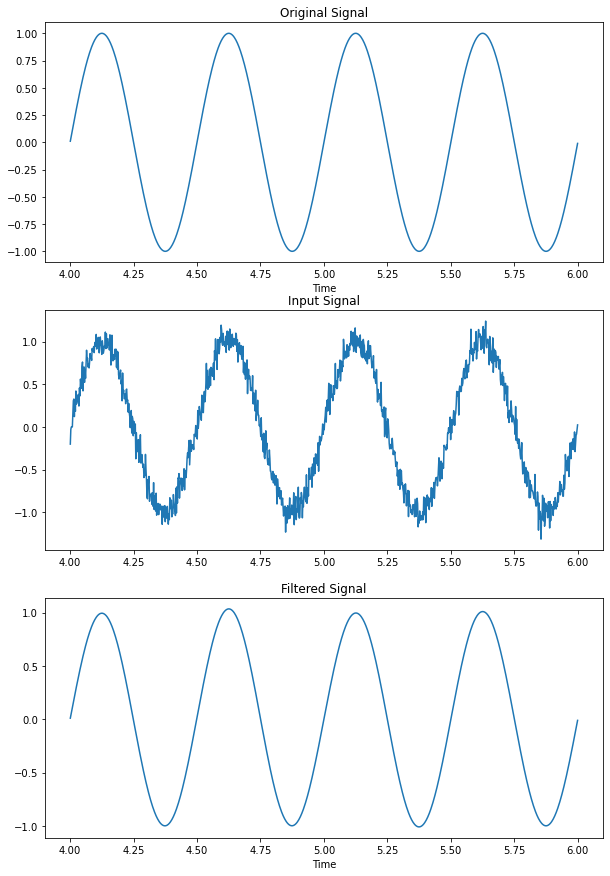

In [199]:
import numpy as np                     # import the numpy packages and use a shorter alising name
import matplotlib.pyplot as plt        # again import the matplotlib's pyplot packages
from scipy import signal               # import a minor package signal from scipy
plt.figure(figsize=(10, 15))           # fix the plot size

#  ----------- YOUR CODE -----------
#part 1
t = np.linspace(0, 10, 500 * 10)
x = np.sin(2*np.pi * 2 * t)
plt.subplot(3,1,1) 
plt.plot(t[2000:3000], x[2000:3000])
plt.xlabel('Time')

plt.title("Original Signal")


#part 2
mu = 0 #mean
sigma = 0.1 #std dev
noise = np.random.randn(500 * 10)*sigma + mu
x_n = x + noise
plt.subplot(3,1,2)
plt.plot(t[2000:3000], x_n[2000:3000])
plt.title("Input Signal")


#part 3
#Nyquist is half of the sampling rate (i.e, 0.5 * 500 = 250 Hz)
b, a = signal.butter(N = 5, Wn = 4/250, btype='low', analog=False, output='ba', fs=None )
#note: can also do b, a = signal.butter(N = 5, Wn = (4 / Nyquist_freq), btype='low', analog='False', output='ba', fs=None)
#but in this case note that Wn is between 0 and 1 and relative to Nyquist
plt.subplot(3,1,3)
y = signal.filtfilt(b, a, x_n)
plt.plot(t[2000:3000], y[2000:3000])
plt.title("Filtered Signal")
plt.xlabel('Time')
plt.show()

# Section 2

## Exercise 2.1

*   Plot the third image in the test data set
*   Find the correspoding label for the this image and make it the title of the figure


label for 3rd image in test dataset is: 1


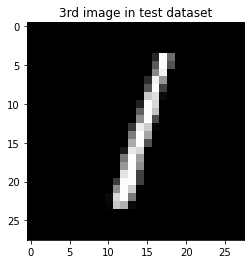

In [68]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#  ----------- YOUR CODE -----------

#Plot the 3rd image in the Test dataset
#print(test_images.shape)
plt.imshow(test_images[2], cmap='gray')
plt.title("3rd image in test dataset")

print("label for 3rd image in test dataset is:", test_labels[2])

# Exercise 2.2
It is usually helpful to have an accuracy plot as well as a loss value plot to get an intuitive sense of how effectively the model is being trained. 

* Add code to this example for plotting two graphs with the following requirements:
  - Use a 1x2 subplot with the left subplot showing the loss function and right subplot showing the accuracy.
  - For each graph, plot the value with respect to epochs. Clearly label the x-axis, y-axis and the title.

(Hint: The value of of loss and accuracy are stored in the `hist` variable. 
Try to print out `hist.history` and `his.history.keys()`.)

In [105]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1))) #network takes in a 28*28 or 784 dim col vector
network.add(layers.Dense(512, activation='relu')) #takes the 784 --> 512, applies ReLU
network.add(layers.Dense(10, activation='softmax')) #takes the 512 --> 10, applies a SoftMax

network.summary()

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255 #rescale data to 0-1
test_images_nor = test_images.astype('float32') / 255 #rescale data to 0-1 (from 0 - 255)

train_labels_cat = to_categorical(train_labels) #one hot encoded label (i.e 3 is a vector of 0s and 1 at element 4)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.2533 - accuracy: 0.9261
Epoch 2/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.1021 - accuracy: 0.9699
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0688 - accuracy: 0.9792
Epoch 4/5
60000/60000 [==============================] - 7s 12

{'loss': [0.2546789679010709, 0.10463036631743113, 0.06978923072814941, 0.05129882912536462, 0.03833419142862161], 'accuracy': [0.9256333, 0.9687167, 0.97875, 0.98433334, 0.9885833]}
dict_keys(['loss', 'accuracy'])


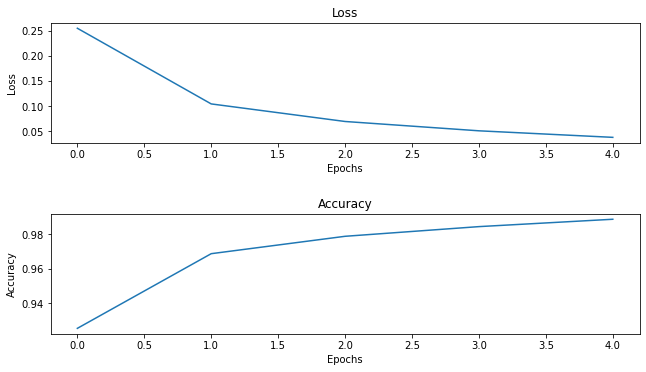

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, figsize=(10,6))
fig.tight_layout(pad=5.0)


#  ----------- YOUR CODE -----------
print(hist.history)
print(hist.history.keys())
ax[0].plot(hist.history['loss'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")



ax[1].plot(hist.history['accuracy'])
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.show()

## Exercise 2.3
Use the dense network from Section 2 as the basis to construct of a deeper network with

*  5 dense hidden layers with dimensions [512, 256, 128, 64, 32] each of which uses a ReLU non-linearity

**Question:** Will the accuracy on the testing data always get better if we keep making the neural network larger?



No, it doesn't necessarily get better - it is very close to the accuracy of the smaller network, but actually a little bit less accurate in this case.

In [103]:
import keras
from keras import models
from keras import layers

#  ----------- YOUR CODE -----------
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1))) #network takes in a 28*28 or 784 dim col vector
network.add(layers.Dense(512, activation='relu')) #takes the 784 --> 512, applies ReLU
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax')) #takes the 512 --> 10, applies a SoftMax

network.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

In [104]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 14s 236us/step - loss: 0.2873 - accuracy: 0.9127
Epoch 2/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.1014 - accuracy: 0.9703
Epoch 3/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.0693 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.0527 - accuracy: 0.9843
Epoch 5/5
10000/10000 [==============================] - 2s 191us/step
test_accuracy: 0.9763000011444092


# Section 3

## Exercise 3.1
In this exercise, you will access the relationship between the feature extraction layer and classification layer. The example above uses two sets of convolutional layers and pooling layers in the feature extraction layer and two dense layers in the classification layers. The overall performance is around 98% for both training and test dataset. In this exercise, try to create a similar CNN network with the following requirements:

*   Achieve the overall accuracy higher than 99% for training and testing dataset.
*  Keep the total number of parameters used in the network lower than 100,000.

In [116]:
import keras
from keras import models
from keras import layers

network = models.Sequential()

#  ----------- YOUR CODE -----------

# ---- Feature extraction section
# First Layer
network.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
# Second Layer
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
#add a third layer:
# network.add(layers.Conv2D(64, (3,3), activation='relu'))
# network.add(layers.MaxPooling2D((2,2)))


# ---- Classification section
# Rearrange the data
network.add(layers.Flatten())
# Third Layer
#network.add(layers.Dense(512, activation='relu'))
#third layer
network.add(layers.Dense(64, activation = 'relu'))
# fifth Layer
network.add(layers.Dense(10, activation='softmax'))

network.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 64)              

In [119]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images_nor, train_labels_cat, epochs=6, batch_size=64)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/6
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0369 - accuracy: 0.9890
Epoch 2/6
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 3/6
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 4/6
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 5/6
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 6/6
10000/10000 [==============================] - 4s 401us/step
test_accuracy: 0.9864000082015991


# Section 4

## Exercise 4.1
In this exercise you will need to create the entire neural network that does image denoising tasks. Try to mimic the code provided above and follow the structure as provided in the instructions below.

**Task 1**: Create the datasets
1.   Import necessary packages
2.   Load the MNIST data from Keras, and save the training dataset images as `train_images`, save the test dataset images as `test_images`
3.   Add additive white gaussian noise to the train images as well as the test images and save the noisy images to `train_images_noisy` and `test_images_noisy` respectivly. The noise should have mean value 0, and standard deviation 0.4. (Hint: Use [np.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html))
4.   Show the first image in the training dataset as well as the test dataset (plot the images in 1 x 2 subplot form)

Text(0.5, 1.0, 'noisy test image')

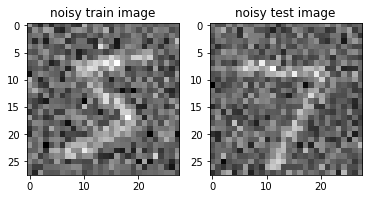

In [185]:
#  ----------- YOUR CODE -----------
### Part 1, load packages:
from keras.datasets import mnist
from keras.utils import to_categorical


#part 2, load MNIST data from Keras, save the training dataset as train_images, test dataset as test_images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))

train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

#Part 3, add additive white gaussian noise to the train images and test images.
noise_train = np.random.normal(loc=0, scale=0.4, size = (60000,28,28,1))
noise_test = np.random.normal(loc = 0, scale = 0.4, size = (10000, 28, 28, 1))
train_images_noisy = train_images_nor + noise_train
test_images_noisy = test_images_nor + noise_test

#part 4, show the first image in training and first image in test dataset

plt.subplot(1,2,1)
plt.imshow(train_images_noisy[0], cmap='gray')
plt.title("noisy train image")

plt.subplot(1,2,2)
plt.imshow(test_images_noisy[0], cmap='gray')
plt.title("noisy test image")

**Task 2**: Create the neural network model
1.   Create a sequential model called `encoder` with the following layers sequentially:
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function and name the layer as `'convOutput'`.
  * flatten layer
  * dense layer with output dimension as `encoding_dim`  with `'relu'` activition function.
2.   Create a sequential model called `decoder` with the following layers sequentially:
  * dense layer with the input dimension as `encoding_dim` and the output dimension as the product of the output dimenstions of the `'convOutput'` layer.
  * reshape layer that convert the tensor into the same shape as `'convOutput'`
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function
  * convolutional layer with `1` output channels, `3x3` kernel size, and the padding convention `'same'` with `'sigmoid'` activition function
3. Create a sequential model called `autoencoder` with the following layers sequentially:
  * `encoder` model
  * `decoder` model
 

In [186]:
#  ----------- YOUR CODE -----------
# Build Encoder
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
encoder.add(layers.MaxPooling2D((2, 2),                  padding='same'))
encoder.add(layers.Conv2D(16, (3, 3),  activation='relu', padding='same'))
encoder.add(layers.MaxPooling2D((2, 2),                  padding='same'))
encoder.add(layers.Conv2D(8, (3, 3),  activation='relu', padding='same', name='convOutput'))
encoder.add(layers.Flatten())
encoding_dim = 32
encoder.add(layers.Dense(encoding_dim, activation='relu'))

# shape considerations
convShape = encoder.get_layer('convOutput').output_shape[1:]
print(convShape)
denseShape = convShape[0]*convShape[1]*convShape[2]
print(denseShape)
#Build Decoder
decoder = models.Sequential()
decoder.add(layers.Dense(denseShape, input_shape=(encoding_dim,)))
decoder.add(layers.Reshape(convShape))

decoder.add(layers.Conv2D(8, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(16, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(32, (3, 3), activation='relu',    padding='same'))
decoder.add(layers.Conv2D(1, (3, 3),  activation='sigmoid', padding='same'))



(7, 7, 8)
392


In [184]:
encoder.summary()
decoder.summary()

autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)
autoencoder.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
convOutput (Conv2D)          (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten_23 (Flatten)         (None, 392)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)              

**Task 3**: Create the neural network model  

Fit the model to the training data using the following hyper-parameters:
  * `adam` optimizer
  * `binary_crossentropy` loss function
  * `20` training epochs
  * batch size as `256`
  * set `shuffle` as `True`
  
Compile the model and fit ...

In [157]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_images_noisy, train_images_nor, 
                epochs=1, 
                batch_size=256,
                shuffle=True)

Epoch 1/1
60000/60000 [==============================] - 630s 10ms/step - loss: 0.1785


**Task 4**: Create the neural network model (No need to write code, just run the following commands)

In [179]:
def showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=None):

    numCols = 3 if groundTruth is None else 4
  
    num_images = input_imgs.shape[0]
      
    encoded_imgs = encoded_imgs.reshape((num_images, 1, -1))
    

    plt.figure(figsize=((numCols+encoded_imgs.shape[2]/input_imgs.shape[2])*size, num_images*size))

    pltIdx = 0
    col = 0
    for i in range(0, num_images):

        col += 1
    # plot input image
        pltIdx += 1
        ax = plt.subplot(num_images, numCols, pltIdx)
        plt.imshow(input_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if col == 1:
            plt.title('Input Image')

    # plot encoding
        pltIdx += 1
        ax = plt.subplot(num_images, numCols, pltIdx)
        plt.imshow(encoded_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if col == 1:
            plt.title('Encoded Image')

    # plot reconstructed image
        pltIdx += 1
        ax = plt.subplot(num_images, numCols, pltIdx)
        plt.imshow(output_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if col == 1:
            plt.title('Reconstructed Image')

        if numCols == 4:
          # plot ground truth image
            pltIdx += 1
            ax = plt.subplot(num_images, numCols, pltIdx)
            plt.imshow(groundTruth[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            if col == 1:
                plt.title('Ground Truth')

    plt.show()

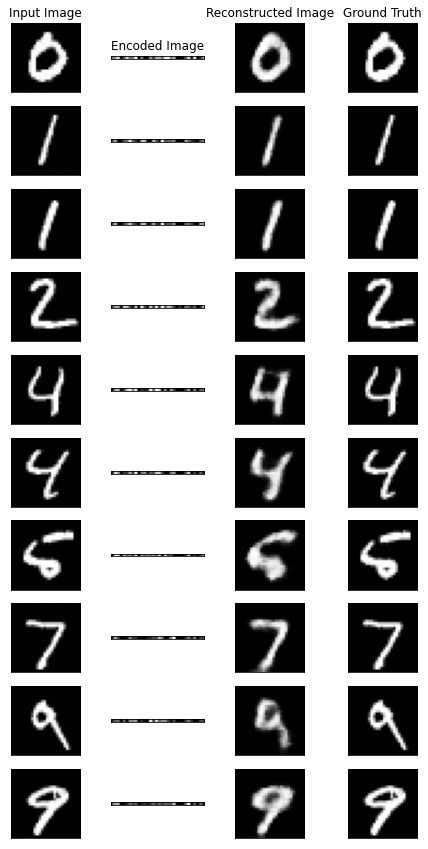

In [182]:
num_images = 10

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images_noisy[I]

encoded_imgs = encoder.predict(test_images_noisy[I])
output_imgs = decoder.predict(encoded_imgs)

showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=test_images_nor[I])